In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [66]:
data = pd.read_csv('data/dummies_26_04_2021.csv')
pdata = pd.read_csv('data/dummies_panel.csv')

In [68]:
X = data.drop(['Price/hour in USD', 'rating', 'nb_reviews', 'nb_projects', 'nb_buyers'], axis=1)
y = data['Price/hour in USD']
X.shape

(5906, 391)

### Principal Component Analysis and feature weightings

There are a large number of features in the dataset (391). PCA (Principal Component Analysis) can be used to reduce this into a smaller number of components which still explain as much variation in the data as possible.

PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

In [69]:
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

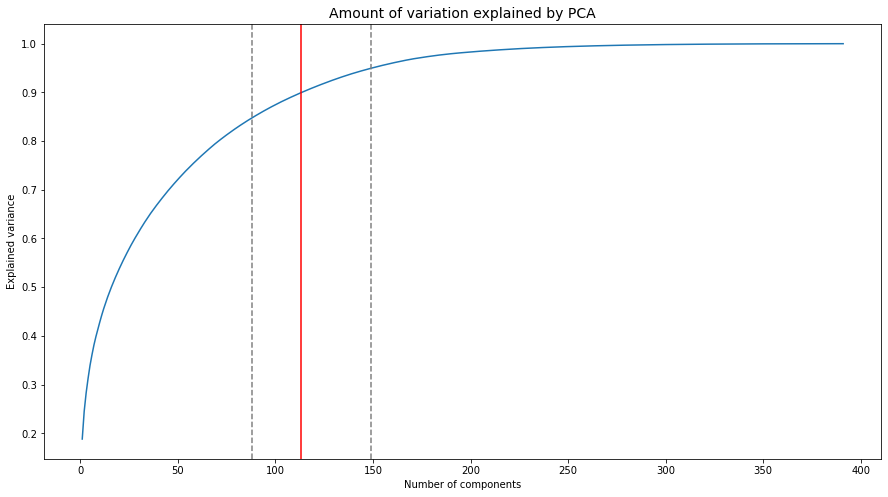

In [154]:
# Plotting the amount of variation explained by PCA with different numbers of components
figure = plt.figure(figsize=(15,8))

plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.axvline(88, 0, 1, c='gray', linestyle='--')
plt.axvline(113, 0, 1, c='r')
plt.axvline(149, 0, 1, c='gray', linestyle='--')

plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

There is no obvious elbow in this plot, so different values for n_components will be tried below with logistic regression to see which produces the best score.



In [150]:
print("Number of components explaining 85% of variance:", np.where(explained_var > 0.85)[0][0])
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 95% of variance:", np.where(explained_var > 0.95)[0][0])

Number of components explaining 85% of variance: 88
Number of components explaining 90% of variance: 113
Number of components explaining 95% of variance: 149


In [151]:
n_comps = [88,113,149]

for n in n_comps:
    
    pca = PCA(n_components = n)
    X_pca = pca.fit_transform(X)
    
    model = sm.OLS(y, X_pca)
    result = model.fit()
    print("\nNumber of components:", n)
    print("Score:", round(result.rsquared, 4))


Number of components: 88
Score: 0.0787

Number of components: 113
Score: 0.0858

Number of components: 149
Score: 0.093


The above results show that the evolves with the number of components but there is no significant difference.

In [142]:
# Feature weightings on each component, in order of average weighting
pca = PCA(n_components=113)
pca.fit_transform(X)
pca_components = pd.DataFrame(pca.components_,columns=X.columns).T
pca_components['mean_weight'] = pca_120_components.iloc[:].abs().mean(axis=1)
pca_components.sort_values('mean_weight', ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,mean_weight
marketing writing,0.021754,0.123276,0.030500,-0.098063,-0.002652,0.056538,9.054093e-03,-0.124591,0.026884,-0.141054,...,0.045159,-0.059766,-0.007805,0.016394,0.001838,-0.010102,-0.019208,0.000664,0.024143,0.070884
search engine optimization article,0.031807,0.135709,0.045577,0.085034,0.154936,0.113122,-3.119491e-02,0.275448,-0.146926,0.028595,...,-0.036408,-0.064031,-0.011831,0.093327,-0.042229,0.030843,-0.043469,0.054666,0.041282,0.067956
virtual assistant,-0.002974,-0.036499,-0.007321,-0.033868,-0.051503,0.023450,1.020107e-01,0.153401,0.148201,-0.003643,...,-0.008906,0.099324,-0.071256,0.022055,-0.087555,-0.044009,0.089807,0.028099,-0.001666,0.067902
graphics design,0.001272,-0.015108,0.049173,0.013244,-0.025275,-0.007935,-2.457411e-02,-0.038352,0.050534,0.051344,...,0.052745,-0.102760,-0.065046,0.127583,-0.042691,0.050239,-0.046020,-0.046139,-0.014974,0.067315
social media marketing,0.006643,0.118479,0.215459,-0.180390,-0.166662,0.099727,-1.456032e-02,0.011760,0.125705,-0.198158,...,-0.061358,-0.010924,0.010194,0.022319,-0.011529,0.021119,0.005565,-0.031483,0.003670,0.066979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,-0.000029,-0.000154,-0.000225,-0.000131,0.000274,-0.000070,-7.038837e-04,-0.000147,0.000390,-0.000283,...,-0.000035,0.000456,-0.000318,0.000664,-0.001374,0.000518,-0.000188,-0.000336,0.000227,0.000427
Somali,-0.000077,-0.000193,-0.000187,0.000081,-0.000102,0.000334,-7.432415e-04,-0.000035,0.000242,0.000091,...,-0.000195,0.000230,-0.000163,0.000301,0.000657,-0.001066,-0.000217,-0.000207,0.000082,0.000374
Northern Mariana Islands,-0.000116,0.000268,-0.000029,0.000033,0.000340,0.000114,6.723759e-04,-0.000855,0.001011,-0.000473,...,-0.000181,-0.000456,-0.000413,0.000089,-0.000009,-0.000334,0.000665,-0.000182,-0.000240,0.000355
Nicaragua,-0.000085,-0.000448,0.000125,-0.000074,0.000442,0.000365,-2.460493e-07,-0.000401,-0.000381,-0.000174,...,-0.001225,-0.001777,-0.000170,-0.001924,-0.001008,-0.001119,0.001100,-0.000318,0.000653,0.000350


In [155]:
for i in range(0, 7):
    print("component number :", i)
    print(round(pca_components[i].map(lambda x : x).abs().sort_values(ascending = False)[:3],3), '\n')

component number : 0
score                         0.986
last_active                   0.070
search engine optimization    0.057
Name: 0, dtype: float64 

component number : 1
content writing    0.394
blog writing       0.389
copywriting        0.295
Name: 1, dtype: float64 

component number : 2
proofreading    0.440
editing         0.364
marketing       0.346
Name: 2, dtype: float64 

component number : 3
United Kingdom    0.464
last_active       0.340
English           0.278
Name: 3, dtype: float64 

component number : 4
Marketing    0.344
gender       0.330
English      0.317
Name: 4, dtype: float64 

component number : 5
english translation    0.481
United Kingdom         0.407
last_active            0.338
Name: 5, dtype: float64 

component number : 6
gender          0.541
editing         0.467
proofreading    0.295
Name: 6, dtype: float64 

